In [1]:
# data leakage 
# aqui está sem dividir em treino antes de limpar os dados

In [2]:
# importando bibliotecas 

import numpy as np # linear algebra
import pandas as pd # data processing

from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dic = pd.read_excel('C:/Users/maria/Desktop/Bootcamp/Semana 8/Give Me Some Credit (desafio)/Data Dictionary.xls')
dic

,Unnamed: 0,Unnamed: 1,Unnamed: 2
0,Variable Name,Description,Type
1,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
2,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
3,age,Age of borrower in years,integer
4,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
5,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
6,MonthlyIncome,Monthly income,real
7,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
8,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
9,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer


In [4]:
df = pd.read_csv('C:/Users/maria/Desktop/Bootcamp/Semana 8/Give Me Some Credit (desafio)/cs-training.csv')

In [5]:
df.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [6]:
df.info() # MonthlyIncome e NumberOfDependents com nulos

# apenas dados numéricos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


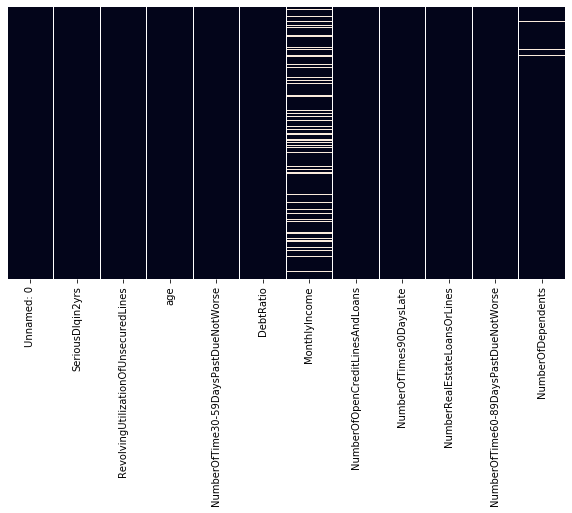

In [7]:
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False)

In [8]:
# preencher valores nulos

df['MonthlyIncome'].fillna(df['MonthlyIncome'].mean(),inplace=True) #float64
df['NumberOfDependents'].fillna(df['NumberOfDependents'].mode()[0], inplace=True) #[0] para o caso de ter mais de uma moda
# número inteiro

# buscar outras formas de preencher nulo e quando usar qual

In [9]:
print(df.isnull().sum())

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64


In [10]:
df.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.737413
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.288045e+04,5.145951,4.169304,1.129771,4.155179,1.107021
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,6.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [11]:
df.SeriousDlqin2yrs.value_counts() # conferindo se a target está balanceada

0    139974
1     10026
Name: SeriousDlqin2yrs, dtype: int64

In [12]:
df.SeriousDlqin2yrs.mean() # muito mais observações 0

0.06684

In [13]:
df.DebtRatio.quantile([.995]) # 0.5% dos maiores devedores

0.995    6186.01
Name: DebtRatio, dtype: float64

In [14]:
df[df['DebtRatio'] > 6186.01]['SeriousDlqin2yrs'].value_counts()

# DebtRatio = Monthly debt payments, alimony, living costs divided by monthy gross income (percent)

0    689
1     61
Name: SeriousDlqin2yrs, dtype: int64

In [15]:
# Remover outliers e preencher com a média

removed_debt_outliers = df.drop(df[df['DebtRatio'] > 6186.01].index)
removed_debt_outliers = removed_debt_outliers.fillna(removed_debt_outliers.median())

In [16]:
df.RevolvingUtilizationOfUnsecuredLines.quantile([.995])

0.995    1.366269
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [17]:
# Remover outliers e preencher com a média

removed_revolving_outliers = df.drop(df[df['DebtRatio'] > 1.366269].index)
removed_revolving_outliers = removed_revolving_outliers.fillna(removed_revolving_outliers.median())

Balanceando o modelo:

![alt text](balancear.png "Balancear")

In [18]:
from xgboost import XGBClassifier

In [19]:
target = df.columns[1]
features = df.columns[2:]

X=df[features]

y=df[target]

# mais fácil fazer por index do que digitar tudo

Sem balancear:

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

# Acurácia e F1 não dizem nada se não está balanceado, pq tem maior precisão no 0

Accuracy: 93.60%


In [21]:
predictions = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

# F1 = 92 (weighted avg)

              precision    recall  f1-score   support

           0       0.94      0.99      0.97     27987
           1       0.57      0.18      0.27      2013

    accuracy                           0.94     30000
   macro avg       0.76      0.59      0.62     30000
weighted avg       0.92      0.94      0.92     30000



In [22]:
from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(y_test,predictions))

0.2968425120963784


Balanceado: (precisa balancear só o train)

In [23]:
#df_train = df.sample(frac=0.8)
#df_test = df - df_train NÃO DÁ CERTO
#df_test.shape

df_train, df_test = train_test_split(df, test_size=0.2, random_state=1)


# criar train no início, aqui já está sendo influenciado pela limpeza que eu fiz

In [24]:
df_train.shape

(120000, 12)

In [25]:
df_test.shape

(30000, 12)

In [26]:
df.shape

(150000, 12)

Random under-sampling:
1    8013
0    8013
Name: SeriousDlqin2yrs, dtype: int64


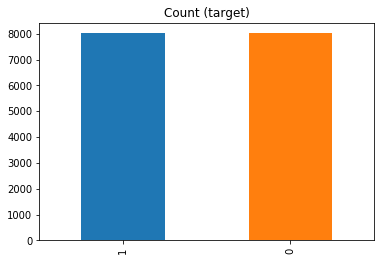

In [27]:
# UNDERSAMPLING

count_class_0, count_class_1 = df_train.SeriousDlqin2yrs.value_counts()

df_class_0 = df_train[df_train['SeriousDlqin2yrs'] == 0]
df_class_1 = df_train[df_train['SeriousDlqin2yrs'] == 1]
df_class_0_under = df_class_0.sample(count_class_1) # dos que estão no 0, quero o sample da quantidade do 1
df_train_under = pd.concat([df_class_0_under, df_class_1], axis=0)
print('Random under-sampling:')
print(df_train_under.SeriousDlqin2yrs.value_counts())
df_train_under.SeriousDlqin2yrs.value_counts().plot(kind='bar', title='Count (target)', color = ['#1F77B4', '#FF7F0E']);

# fiz no dataset todo ao invés de dividir em teste e treino

In [28]:
X = df_train_under[features]
y = df_train_under[target]
# treino balanceado

X_test = df_test[features]
y_test = df_test[target]

In [29]:
# comparando train com test

model = XGBClassifier()
model.fit(X, y) # já está só o treino
y_pred = model.predict(X_test) # prever com X do teste
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.80%


In [30]:
predictions = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88     27987
           1       0.22      0.76      0.34      2013

    accuracy                           0.80     30000
   macro avg       0.60      0.78      0.61     30000
weighted avg       0.93      0.80      0.84     30000



In [31]:
from sklearn.metrics import matthews_corrcoef
print(matthews_corrcoef(y_test,predictions))

# MCC é o valor que devemos buscar pra ser maior

0.33023221459680996
